In [205]:
import numpy as np
import pandas as pd

data_path = './bike-sharing-demand/'

train = pd.read_csv(data_path + 'train.csv') # 훈련 데이터
test = pd.read_csv(data_path + 'test.csv') # 테스트 데이터
submission = pd.read_csv(data_path + 'sampleSubmission.csv') # 제출 샘플 데이터

In [206]:
train.shape, test.shape # 훈련데이터는 10886 행 , 12열 , 테스트데이터는 6493행 9열

((10886, 12), (6493, 9))

In [207]:
train.head() # count는 타깃값(종속변수) ==> 예측해야할 값

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [208]:
test.head() # casual, registered 열이 존재 x ==> 훈련데이터에서 이 2개 열 삭제 시킨다.

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [209]:


train['date'] = train['datetime'].apply(lambda x : x.split()[0]) # 날짜 피처 생성
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year # 연도

train['month'] = train['datetime'].dt.month # 월

train['day'] = train['datetime'].dt.day

train['hour'] = train['datetime'].dt.hour # 시간
train['minute'] = train['datetime'].dt.minute # 분
train['second'] = train['datetime'].dt.second # 초
train['weekday'] = train['datetime'].dt.weekday # 요일

train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,2011,1,1,4,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,2012,12,19,19,0,0,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,2012,12,19,20,0,0,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,2012,12,19,21,0,0,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19,2012,12,19,22,0,0,2


In [210]:
import calendar
from datetime import datetime

# train['weekday'] = train['date'].apply(lambda dateString : calendar.day_name[datetime.strptime(dateString , '%Y-%m-%d').weekday()]) # weekday 출력하기(요일)


train['weekday'] = train['weekday'].apply(lambda dateString : calendar.day_name[dateString]) # weekday 출력하기(요일)
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,2011,1,1,0,0,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,2011,1,1,1,0,0,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,2011,1,1,2,0,0,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,2011,1,1,3,0,0,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,2011,1,1,4,0,0,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,2012,12,19,19,0,0,Wednesday
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,2012,12,19,20,0,0,Wednesday
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,2012,12,19,21,0,0,Wednesday
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19,2012,12,19,22,0,0,Wednesday


In [211]:
train['season'] = train['season'].map({1 : 'Spring' , 2: 'Summer' , 3:'Fall' , 4:'Winter'})

train['weather'] = train['weather'].map({1 : 'Clear' , 2 : 'Mist , Few clouds' , 3: 'Light Snow , Rain , Thunderstorm' , 4 : 'Heavy Rain , Thunderstorm , Snow , Fog'})

train



,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0000,3,13,16,2011-01-01,2011,1,1,0,0,0,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0000,8,32,40,2011-01-01,2011,1,1,1,0,0,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0000,5,27,32,2011-01-01,2011,1,1,2,0,0,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0000,3,10,13,2011-01-01,2011,1,1,3,0,0,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0000,0,1,1,2011-01-01,2011,1,1,4,0,0,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0,1,Clear,15.58,19.695,50,26.0027,7,329,336,2012-12-19,2012,12,19,19,0,0,Wednesday
10882,2012-12-19 20:00:00,Winter,0,1,Clear,14.76,17.425,57,15.0013,10,231,241,2012-12-19,2012,12,19,20,0,0,Wednesday
10883,2012-12-19 21:00:00,Winter,0,1,Clear,13.94,15.910,61,15.0013,4,164,168,2012-12-19,2012,12,19,21,0,0,Wednesday
10884,2012-12-19 22:00:00,Winter,0,1,Clear,13.94,17.425,61,6.0032,12,117,129,2012-12-19,2012,12,19,22,0,0,Wednesday


In [212]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

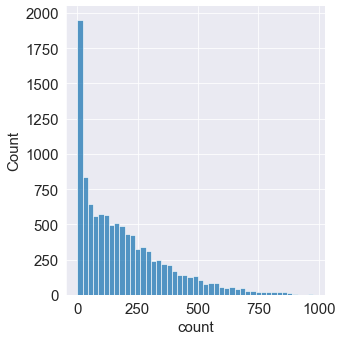

In [213]:
mpl.rc('font' , size = 15) # 폰트 크기를 15로 설정
sns.displot(train['count'])

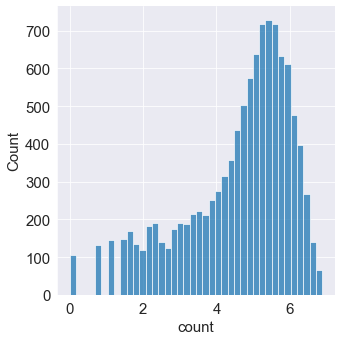

In [214]:
sns.displot(np.log(train['count'])) # 변환 전보다 정규분포에 가까워졌다. 타깃값 분포가 정규분포에 가까울 수록 회귀 모델 성능이 좋다.

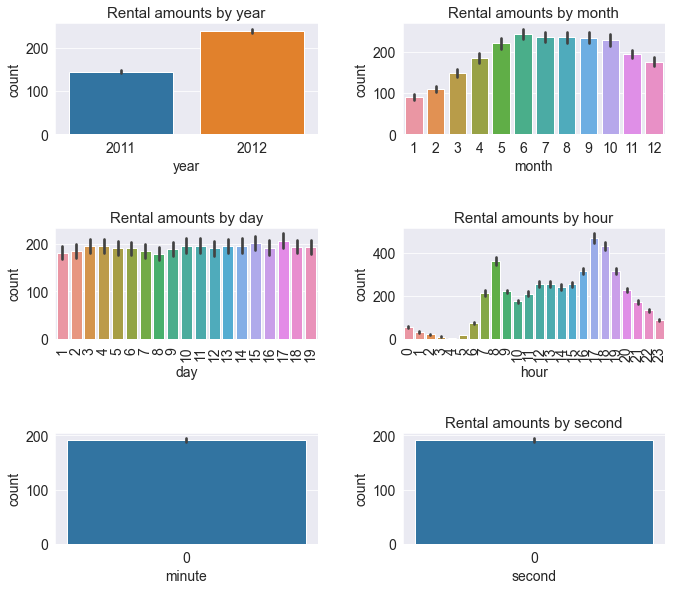

In [215]:
mpl.rc('font' , size = 14) # 폰트 크기 설정
mpl.rc('axes' , titlesize = 15) # 각 축의 제목 크기 설정
figure , axes = plt.subplots(nrows = 3 , ncols= 2) # 3행 2열 Figure 생성
plt.tight_layout() # 그래프 사이에 여백 확보
figure.set_size_inches(10 , 9) # 전체 Figure 크기를 10x9 인치로 설정

sns.barplot(x='year' , y ='count' , data = train , ax = axes[0,0])
sns.barplot(x='month' , y ='count' , data = train , ax = axes[0,1])
sns.barplot(x='day' , y ='count' , data = train , ax = axes[1,0])
sns.barplot(x='hour' , y ='count' , data = train , ax = axes[1,1])
sns.barplot(x='minute' , y ='count' , data = train , ax = axes[2,0])
sns.barplot(x='second' , y ='count' , data = train , ax = axes[2,1])


axes[0,0].set(title ='Rental amounts by year')
axes[0,1].set(title='Rental amounts by month')
axes[1,0].set(title='Rental amounts by day')
axes[1,1].set(title='Rental amounts by hour')
axes[2,1].set(title='Rental amounts by minute')
axes[2,1].set(title='Rental amounts by second')

axes[1,0].tick_params(axis= 'x' , labelrotation = 90)
axes[1,1].tick_params(axis='x' , labelrotation = 90)
plt.show()

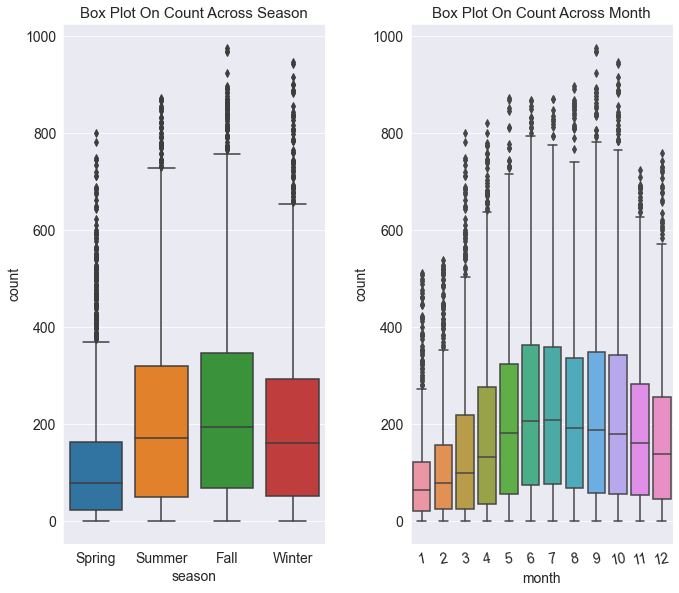

In [216]:
mpl.rc('font' , size = 14) # 폰트 크기 설정
mpl.rc('axes' , titlesize = 15) # 각 축의 제목 크기 설정
figure , axes = plt.subplots(nrows=1 , ncols=2) # 3행 2열 Figure 생성
plt.tight_layout() # 그래프 사이에 여백 확보
figure.set_size_inches(10 , 9) # 전체 Figure 크기를 10x9 인치로 설정

sns.boxplot(x='season' , y ='count' , data = train , ax = axes[0])
sns.boxplot(x='month' , y ='count' , data = train , ax = axes[1])
# sns.boxplot(x='workingday' , y ='count' , data = train , ax = axes[1,1])



axes[0].set(title ='Box Plot On Count Across Season')
axes[1].set(title='Box Plot On Count Across Month')
# axes[1,0].set(title='Box Plot On Count Across Holiday')
# axes[1,1].set(title='Box Plot On Count Across Workingday')

#
axes[1].tick_params(axis= 'x' , labelrotation = 10)

plt.show()

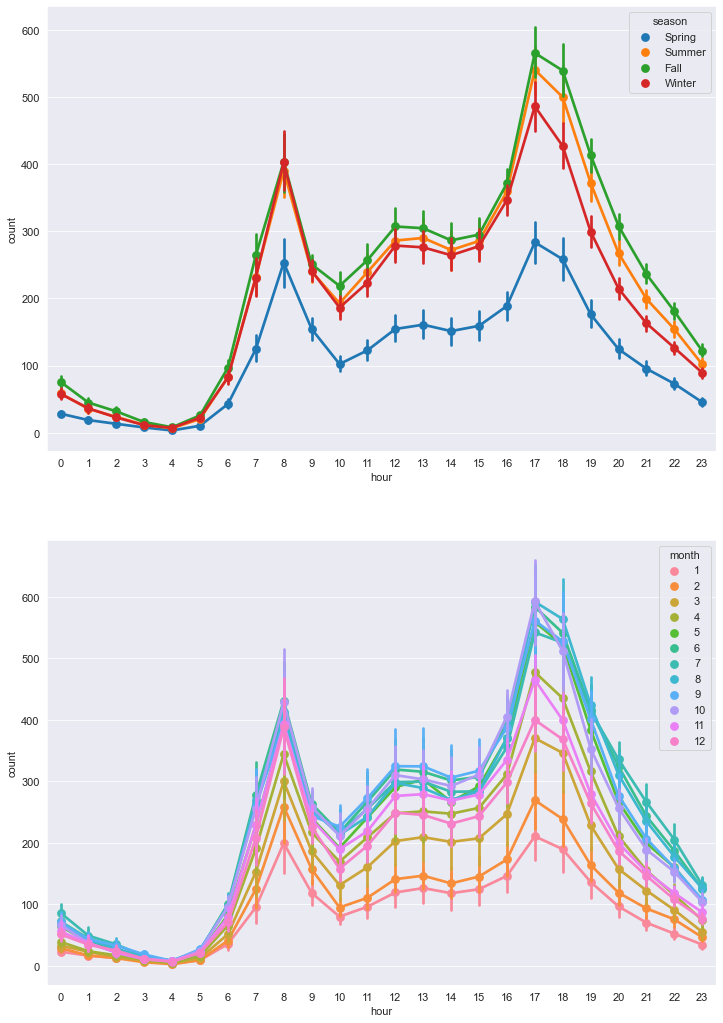

In [217]:
mpl.rc('font'  , size = 11)
figure , axes = plt.subplots(nrows=2) # 5행 1열
figure.set_size_inches(12,18)

# STEP 2 : 서브플롯 할당
# 근무일 , 공휴일 , 요일 ,계절 , 날씨에 따른 시간대별 평균 대여 수량 포인트플롯

sns.pointplot(x='hour' , y='count' , data = train , hue='season' , ax= axes[0]) # hue로 비교하고 싶은 피처 전달
sns.pointplot(x='hour' , y='count' , data = train , hue='month' , ax= axes[1])
# sns.pointplot(x='hour' , y='count' , data = train , hue='weekday' , ax= axes[2])
# sns.pointplot(x='hour' , y='count' , data = train , hue='season' , ax= axes[3])
# sns.pointplot(x='hour' , y='count' , data = train , hue='weather' , ax= axes[4])

## 모델 예측

In [218]:
train = pd.read_csv(data_path + 'train.csv') # 훈련 데이터
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [219]:
train = train[train['weather'] != 4] # 폭우, 폭설 데이터는 이상치 데이터 였다.

In [220]:
all_data = pd.concat([train, test] , ignore_index= True) # 인덱스 무시하고 이어 붙이기
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [221]:
all_data['date'] = all_data['datetime'].apply(lambda x : x.split()[0])

all_data['datetime'] = pd.to_datetime(all_data['datetime'])

all_data['year'] = all_data['datetime'].dt.year # 연도

all_data['month'] = all_data['datetime'].dt.month # 월

all_data['hour'] = all_data['datetime'].dt.hour # 시간

all_data['minute'] = all_data['datetime'].dt.minute # 분

all_data['second'] = all_data['datetime'].dt.second # 초

all_data['weekday'] = all_data['datetime'].dt.weekday # 요일

all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0,2011-01-01,2011,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0,2011-01-01,2011,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0,2011-01-01,2011,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0,2011-01-01,2011,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0,2011-01-01,2011,1,4,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012-12-31,2012,12,19,0,0,0
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012-12-31,2012,12,20,0,0,0
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012-12-31,2012,12,21,0,0,0
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN,2012-12-31,2012,12,22,0,0,0


In [222]:
drop_features = ['casual' , 'registered' , 'datetime' , 'date' , 'season' , 'windspeed']

all_data = all_data.drop(drop_features , axis = 1)

all_data

,holiday,workingday,weather,temp,atemp,humidity,count,year,month,hour,minute,second,weekday
0,0,0,1,9.84,14.395,81,16.0,2011,1,0,0,0,5
1,0,0,1,9.02,13.635,80,40.0,2011,1,1,0,0,5
2,0,0,1,9.02,13.635,80,32.0,2011,1,2,0,0,5
3,0,0,1,9.84,14.395,75,13.0,2011,1,3,0,0,5
4,0,0,1,9.84,14.395,75,1.0,2011,1,4,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17373,0,1,2,10.66,12.880,60,NaN,2012,12,19,0,0,0
17374,0,1,2,10.66,12.880,60,NaN,2012,12,20,0,0,0
17375,0,1,1,10.66,12.880,60,NaN,2012,12,21,0,0,0
17376,0,1,1,10.66,13.635,56,NaN,2012,12,22,0,0,0


In [223]:
# 훈련 데이터의 테스트 데이터 나누기
X_train = all_data[~pd.isnull(all_data['count'])] # all_data의 count 열에서 null 이 아닌 값들에 대한 모든 열
X_test = all_data[pd.isnull(all_data['count'])] # all_data 의 count열에서 null 인 값들에 대한 모든 열

X_train

,holiday,workingday,weather,temp,atemp,humidity,count,year,month,hour,minute,second,weekday
0,0,0,1,9.84,14.395,81,16.0,2011,1,0,0,0,5
1,0,0,1,9.02,13.635,80,40.0,2011,1,1,0,0,5
2,0,0,1,9.02,13.635,80,32.0,2011,1,2,0,0,5
3,0,0,1,9.84,14.395,75,13.0,2011,1,3,0,0,5
4,0,0,1,9.84,14.395,75,1.0,2011,1,4,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,0,1,1,15.58,19.695,50,336.0,2012,12,19,0,0,2
10881,0,1,1,14.76,17.425,57,241.0,2012,12,20,0,0,2
10882,0,1,1,13.94,15.910,61,168.0,2012,12,21,0,0,2
10883,0,1,1,13.94,17.425,61,129.0,2012,12,22,0,0,2


In [224]:
X_test

,holiday,workingday,weather,temp,atemp,humidity,count,year,month,hour,minute,second,weekday
10885,0,1,1,10.66,11.365,56,NaN,2011,1,0,0,0,3
10886,0,1,1,10.66,13.635,56,NaN,2011,1,1,0,0,3
10887,0,1,1,10.66,13.635,56,NaN,2011,1,2,0,0,3
10888,0,1,1,10.66,12.880,56,NaN,2011,1,3,0,0,3
10889,0,1,1,10.66,12.880,56,NaN,2011,1,4,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17373,0,1,2,10.66,12.880,60,NaN,2012,12,19,0,0,0
17374,0,1,2,10.66,12.880,60,NaN,2012,12,20,0,0,0
17375,0,1,1,10.66,12.880,60,NaN,2012,12,21,0,0,0
17376,0,1,1,10.66,13.635,56,NaN,2012,12,22,0,0,0


In [225]:
# 타깃값 count 제거
X_train = X_train.drop(['count'] , axis =1)
X_test = X_test.drop(['count'], axis =1)

y = train['count'] # 타깃값

In [226]:
import numpy as np

def rmsle(y_true , y_pred , convertExp = True):

    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)

    # 로그변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log(y_true +1))
    log_pred = np.nan_to_num(np.log(y_pred +1))


    # RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

In [227]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

log_y = np.log(y) # 타깃값 로그변환
linear_reg_model.fit(X_train , log_y) # 모델 훈련

LinearRegression()

In [228]:
preds = linear_reg_model.predict(X_test) # 코드 실행시 훈련된 선형 회귀 모델이 X_train 피처를 기반으로 타깃값을 예측

# 훈련시에는 훈련 데이터만, 검증시 검증 데이터만 , 테스트 시 테스트 데이터를 사용해야 한다.

# 지금처럼 훈련 시 사용한 데이터를 예측할 때 사용하는 경우는 없다.

# 시험 공부할 때 이미 풀어본 문제가 실제 시험에 나오면 안되는 이유와 같기 때문이다.

In [229]:
print(f'선형 회귀의 RMSLE 값 : {rmsle(preds, True) : .4f}')#

선형 회귀의 RMSLE 값 :  3.3978


In [230]:
linearreg_preds =  linear_reg_model.predict(X_test) # 테스트 데이터로 예측

submission['count'] = np.exp(linearreg_preds) # 지수 변환
submission.to_csv('C:/Users/andyp/Desktop/티스토리/머신러닝/KAGGLE/자전거수요예측/submission2.csv' , index =False) # 파일로 저장

In [231]:
preds = linear_reg_model.predict(X_train) # 코드 실행시 훈련된 선형 회귀 모델이 X_train 피처를 기반으로 타깃값을 예측

# 훈련시에는 훈련 데이터만, 검증시 검증 데이터만 , 테스트 시 테스트 데이터를 사용해야 한다.

# 지금처럼 훈련 시 사용한 데이터를 예측할 때 사용하는 경우는 없다.

# 시험 공부할 때 이미 풀어본 문제가 실제 시험에 나오면 안되는 이유와 같기 때문이다.

In [232]:
print(f'선형 회귀의 RMSLE 값 : {rmsle(log_y , preds, True) : .4f}')

선형 회귀의 RMSLE 값 :  1.0187


In [233]:
linearreg_preds =  linear_reg_model.predict(X_test) # 테스트 데이터로 예측

submission['count'] = np.exp(linearreg_preds) # 지수 변환
submission.to_csv('C:/Users/andyp/Desktop/티스토리/머신러닝/KAGGLE/자전거수요예측/submission3.csv' , index =False) # 파일로 저장

## 랜덤 포레스트

In [234]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# 교차검증용 평가 함수(RMSLE 점수 계산)
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better= False)

# 모델 생성

randomforest_model = RandomForestRegressor()

# 그리드서치 객체 생성

rf_params = {'random_state' : [42] , 'n_estimators' : [100, 120 ,140]} # random_state는 랜덤 시드값 , n_estimators는 랜덤 포레스트를 구성하는 결정 트리 개수

gridsearch_random_forest_model = GridSearchCV(estimator= randomforest_model , param_grid= rf_params ,
                                              scoring = rmsle_scorer , cv=5)

# 그리드서치 수행

log_y = np.log(y)
gridsearch_random_forest_model.fit(X_train , log_y)

print('최적 하이퍼파라미터 : ' , gridsearch_random_forest_model.best_params_)

최적 하이퍼파라미터 :  {'n_estimators': 140, 'random_state': 42}


In [235]:
# 예측
preds = gridsearch_random_forest_model.best_estimator_.predict(X_train)

# 평가
print(f'랜덤 포레스트 회귀 RMSLE 값 : {rmsle(log_y , preds , True) : .4f}' )

랜덤 포레스트 회귀 RMSLE 값 :  0.1085


Text(0.5, 1.0, 'Predicted Test Data Distribution')

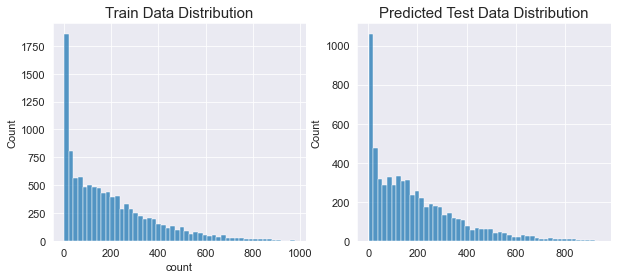

In [236]:
import seaborn as sns
import matplotlib.pyplot as plt

randomforest_preds = gridsearch_random_forest_model.best_estimator_.predict(X_test)

fig, ax = plt.subplots(ncols=3)
fig.set_size_inches(10,4)

sns.histplot(y, bins = 50 , ax = ax[0])
ax[0].set_title('Train Data Distribution')
sns.histplot(np.exp(randomforest_preds) , bins = 50 , ax = ax[1])
ax[1].set_title('Predicted Test Data Distribution')
sns.histplot(np.exp(randomforest_preds) , bins = 50 , ax = ax[2])
ax[2].set_title('Predicted Test Data Distribution')

In [237]:
submission['count'] = np.exp(randomforest_preds) # 지수 변환

submission

submission.to_csv('C:/Users/andyp/Desktop/티스토리/머신러닝/KAGGLE/자전거수요예측/submission_랜덤포레스트_month.csv' , index =False) # 파일로 저장